In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Machine Learning Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgbm


In [2]:
train=pd.read_csv('../input/spaceship-titanic/train.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [6]:
pd.DataFrame((train.isna().sum()/ train.shape[0])*100)

,0
PassengerId,0.000000
HomePlanet,2.312205
CryoSleep,2.496261
Cabin,2.289198
Destination,2.093639
Age,2.059128
VIP,2.335212
RoomService,2.082135
FoodCourt,2.105142
ShoppingMall,2.392730


<p class="text-primary"> Missing values table displays the percentage of missing values in this dataset. Except the PassengerId and the target variable (Transported), all the other features have nearly missing values in between two to three percent. Such an extent of percentage missing values can be replaced using different characteristics.</p>

In [7]:
pd.DataFrame(train.nunique())

,0
PassengerId,8693
HomePlanet,3
CryoSleep,2
Cabin,6560
Destination,3
Age,80
VIP,2
RoomService,1273
FoodCourt,1507
ShoppingMall,1115


<p class="text-primary"> It is observed that features HomePlanet, CryoSleep, Destination, VIP are categorical variables.</p>
<hr> 
<p class="text-primary"> Remaining features have more than 10 unique values. These features are likely numerical features.</p>

<div>
    
<h2>2.2 Correlations <a id='phase2.2'></a></h2>
    
</div>

<AxesSubplot:>

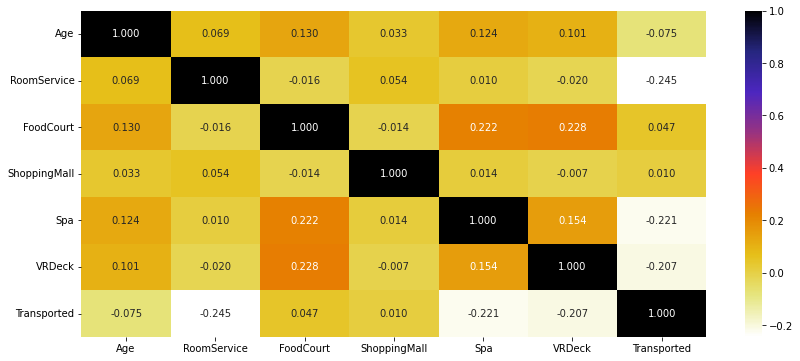

In [8]:
plt.figure(figsize=(14,6))
sns.heatmap(train.corr(), annot=True, fmt='.3f', cmap='CMRmap_r')

<p class="text-primary"> Most associated feature with the target variable is 'RoomService' while ShoppingMall is the least associated feature.</p>

<AxesSubplot:>

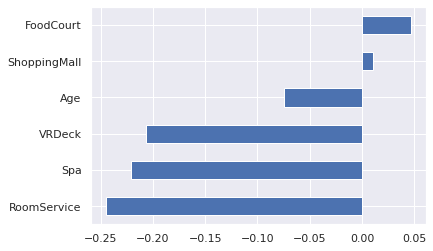

In [9]:
sns.set_theme()
train.corr()['Transported'].drop('Transported').sort_values().plot.barh()

<div>
    
<h2>2.3 Tabular Results <a id='phase2.3'></a></h2>
    
</div>

In [10]:
train['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

<p class='text-primary'> Nearly 50% passengers were lost during this maiden voyage.</p>

In [11]:
pd.DataFrame(train.groupby(['HomePlanet'])['Transported'].value_counts())

Transported
HomePlanet Transported             
Earth      False               2651
           True                1951
Europa     True                1404
           False                727
Mars       True                 920
           False                839

In [12]:
pd.DataFrame(train.groupby(['CryoSleep'])['Transported'].value_counts())

Transported
CryoSleep Transported             
False     False               3650
          True                1789
True      True                2483
          False                554

In [13]:
pd.DataFrame(train.groupby(['HomePlanet', 'Destination'])['Transported'].value_counts())

Transported
HomePlanet Destination   Transported             
Earth      55 Cancri e   True                 348
                         False                342
           PSO J318.5-22 False                357
                         True                 355
           TRAPPIST-1e   False               1894
                         True                1207
Europa     55 Cancri e   True                 611
                         False                275
           PSO J318.5-22 True                  14
                         False                  5
           TRAPPIST-1e   True                 755
                         False                434
Mars       55 Cancri e   True                 118
                         False                 75
           PSO J318.5-22 False                 27
                         True                  22
           TRAPPIST-1e   True                 755
                         False                720

In [14]:
pd.DataFrame(train.groupby(['HomePlanet', 'Destination', 'CryoSleep'])['Transported'].value_counts())

Transported
HomePlanet Destination   CryoSleep Transported             
Earth      55 Cancri e   False     False                289
                                   True                 183
                         True      True                 158
                                   False                 47
           PSO J318.5-22 False     False                232
                                   True                 108
                         True      True                 239
                                   False                116
           TRAPPIST-1e   False     False               1532
                                   True                 677
                         True      True                 499
                                   False                310
Europa     55 Cancri e   False     False                263
                                   True                 157
                         True      True                 439
                                   False                  2
           PSO J318.5-22 False     False                  5
                                   True                   5
                         True      True                   9
           TRAPPIST-1e   False     False                416
                                   True                 295
                         True      True                 439
                                   False                  8
Mars       55 Cancri e   False     False                 70
                                   True                  42
                         True      True                  74
                                   False                  2
           PSO J318.5-22 False     False                 24
                                   True                  12
                         True      True                  10
                                   False                  1
           TRAPPIST-1e   False     False                648
                                   True                 231
                         True      True                 506
                                   False                 55

In [15]:
pd.DataFrame(train.groupby(['HomePlanet', 'Destination', 'VIP', 'CryoSleep'])['Transported'].value_counts())

Transported
HomePlanet Destination   VIP   CryoSleep Transported             
Earth      55 Cancri e   False False     False                281
                                         True                 178
                               True      True                 154
                                         False                 43
           PSO J318.5-22 False False     False                227
                                         True                 103
                               True      True                 235
                                         False                113
           TRAPPIST-1e   False False     False               1502
                                         True                 661
                               True      True                 487
                                         False                300
Europa     55 Cancri e   False False     False                223
                                         True                 142
                               True      True                 418
                                         False                  2
                         True  False     False                 36
                                         True                  13
                               True      True                  11
           PSO J318.5-22 False True      True                   9
                         True  False     False                  5
                                         True                   5
           TRAPPIST-1e   False False     False                384
                                         True                 263
                               True      True                 421
                                         False                  8
                         True  False     True                  25
                                         False                 22
                               True      True                   9
Mars       55 Cancri e   False False     False                 69
                                         True                  41
                               True      True                  72
                                         False                  2
           PSO J318.5-22 False False     False                 18
                                         True                   9
                               True      True                   9
                                         False                  1
                         True  False     False                  6
                                         True                   2
           TRAPPIST-1e   False False     False                587
                                         True                 216
                               True      True                 492
                                         False                 54
                         True  False     False                 47
                                         True                   8

<div>
    
<h2>2.4 Graphical Presentation <a id='phase2.4'></a></h2>
    
</div>

<p class='text-primary'> Let's visualize same tables using the graphs. </p>

<AxesSubplot:xlabel='HomePlanet', ylabel='Count'>

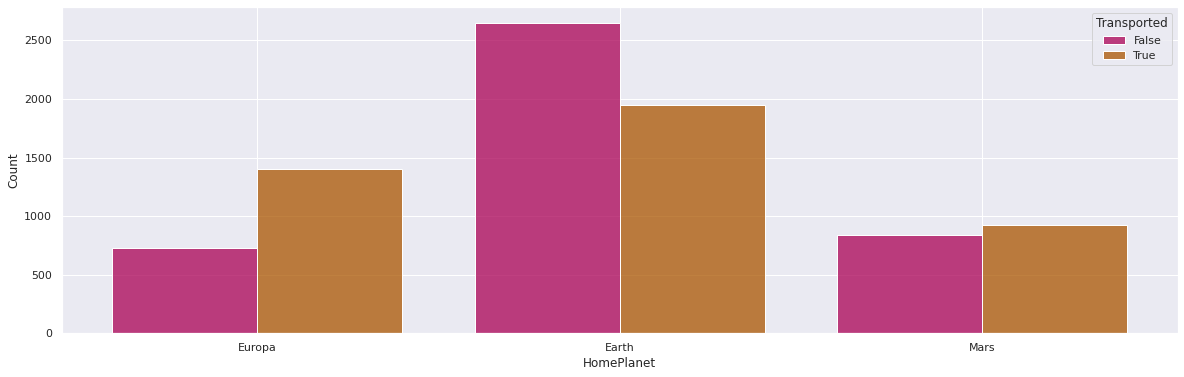

In [16]:
fig=plt.figure(figsize=(20,6))
sns.histplot(x=train['HomePlanet'], shrink=0.8, bins=12, hue=train['Transported'], multiple="dodge",palette='brg' )

<AxesSubplot:xlabel='Destination', ylabel='Count'>

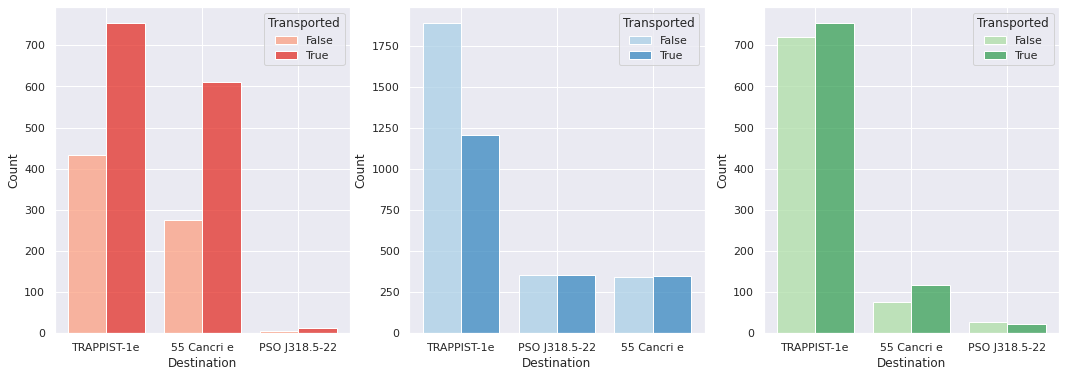

In [17]:
sns.set_theme()
fig=plt.figure(figsize=(18,6))

fig.add_subplot(1,3,1)
sns.histplot(x=train[train['HomePlanet']=='Europa']['Destination'], shrink=0.8, hue=train['Transported'], multiple="dodge",palette='Reds' )

fig.add_subplot(1,3,2)
sns.histplot(x=train[train['HomePlanet']=='Earth']['Destination'], shrink=0.8, hue=train['Transported'], multiple="dodge",palette='Blues' )

fig.add_subplot(1,3,3)
sns.histplot(x=train[train['HomePlanet']=='Mars']['Destination'], shrink=0.8, hue=train['Transported'], multiple="dodge",palette='Greens' )


In [18]:
train['VIP']=train['VIP'].astype('float32')

<AxesSubplot:xlabel='VIP', ylabel='count'>

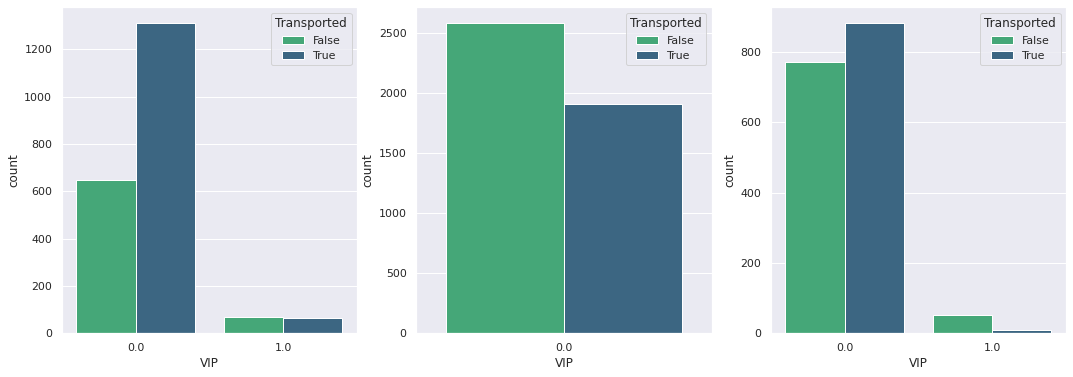

In [19]:
sns.set_theme()
fig=plt.figure(figsize=(18,6))

fig.add_subplot(1,3,1)
sns.countplot(x=train[train['HomePlanet']=='Europa']['VIP'], hue=train['Transported'],palette='viridis_r' )

fig.add_subplot(1,3,2)
sns.countplot(x=train[train['HomePlanet']=='Earth']['VIP'], hue=train['Transported'], palette='viridis_r' )

fig.add_subplot(1,3,3)
sns.countplot(x=train[train['HomePlanet']=='Mars']['VIP'], hue=train['Transported'], palette='viridis_r' )


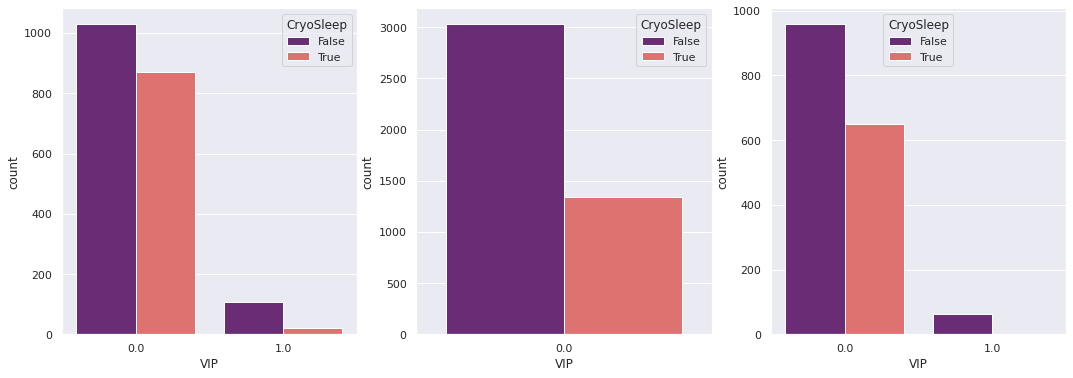

In [20]:
sns.set_theme()
fig=plt.figure(figsize=(18,6))

fig.add_subplot(1,3,1)
sns.countplot(x=train[train['HomePlanet']=='Europa']['VIP'], hue=train['CryoSleep'],palette='magma' )

fig.add_subplot(1,3,2)
sns.countplot(x=train[train['HomePlanet']=='Earth']['VIP'], hue=train['CryoSleep'], palette='magma' )

fig.add_subplot(1,3,3)
sns.countplot(x=train[train['HomePlanet']=='Mars']['VIP'], hue=train['CryoSleep'], palette='magma' )
plt.show()

<AxesSubplot:xlabel='Destination', ylabel='count'>

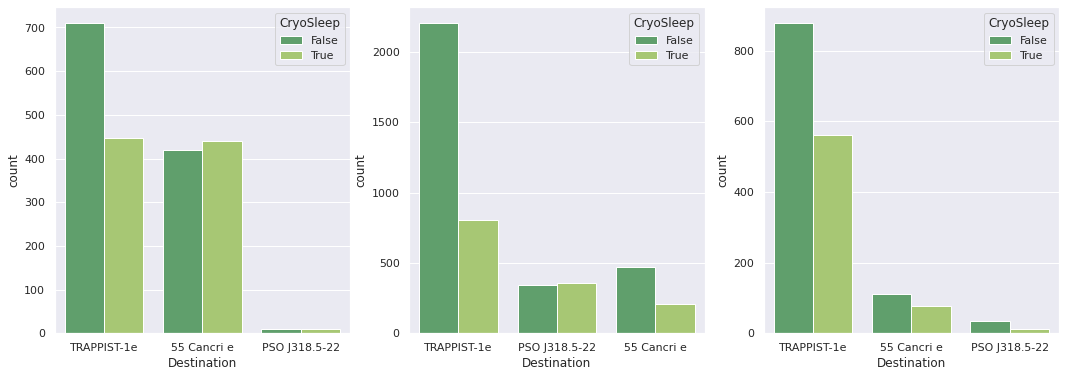

In [21]:
sns.set_theme()
fig=plt.figure(figsize=(18,6))

fig.add_subplot(1,3,1)
sns.countplot(x=train[train['HomePlanet']=='Europa']['Destination'], hue=train['CryoSleep'],palette='summer' )

fig.add_subplot(1,3,2)
sns.countplot(x=train[train['HomePlanet']=='Earth']['Destination'], hue=train['CryoSleep'], palette='summer' )

fig.add_subplot(1,3,3)
sns.countplot(x=train[train['HomePlanet']=='Mars']['Destination'], hue=train['CryoSleep'], palette='summer' )


<p class='text-danger'> Let's analyse numerical characteristics to related target variables as well as other features in this dataset</p>

In [22]:
train['Id']=train.index + 1

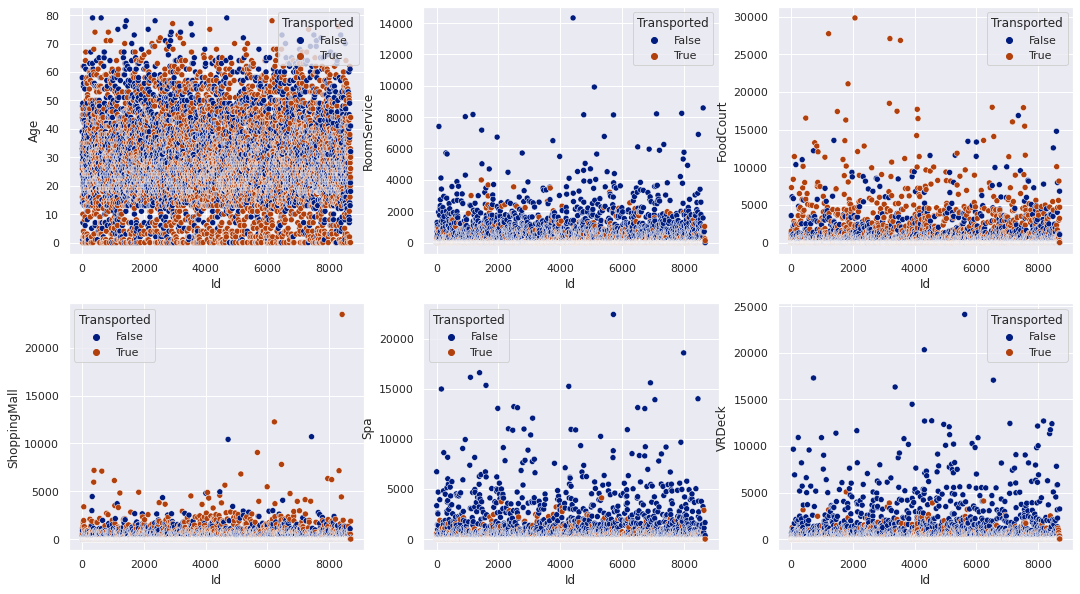

In [23]:
columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' ]
sns.set_theme()
fig=plt.figure(figsize=(18,10))
j=1

for i in columns:
    fig.add_subplot(2,3,j)
    sns.scatterplot(data=train, x='Id', y=i, hue='Transported', palette='dark')
    j+=1

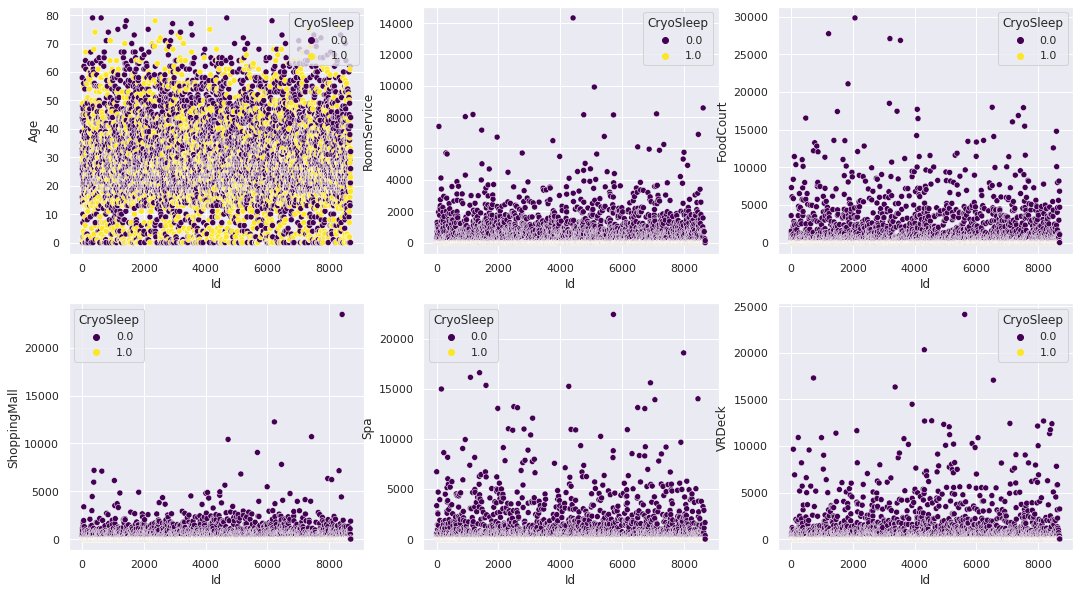

In [24]:
columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' ]
sns.set_theme()
fig=plt.figure(figsize=(18,10))
j=1

for i in columns:
    fig.add_subplot(2,3,j)
    sns.scatterplot(data=train, x='Id', y=i, hue='CryoSleep', palette='viridis')
    j+=1

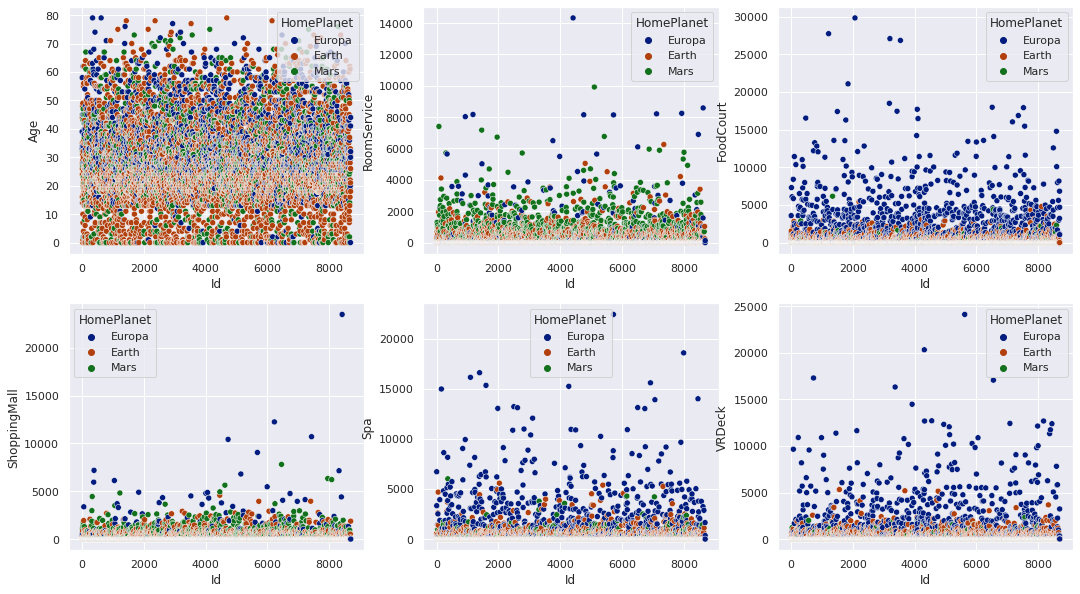

In [25]:
columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' ]
sns.set_theme()
fig=plt.figure(figsize=(18,10))
j=1
m=0
for i in columns:
    fig.add_subplot(2,3,j)
    sns.scatterplot(data=train,x='Id' , y=i, hue='HomePlanet', palette='dark')
    j+=1

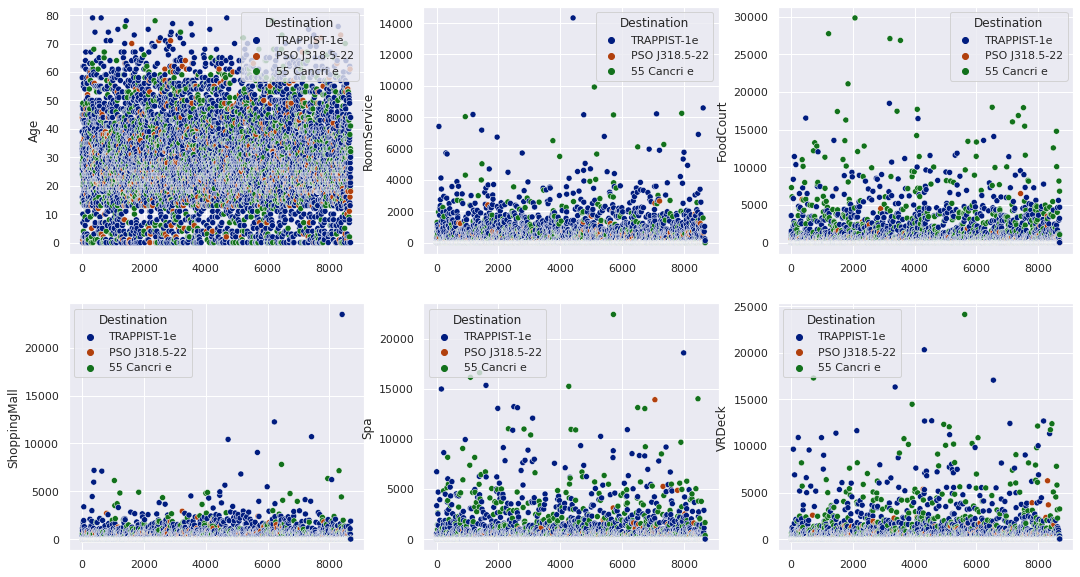

In [26]:
columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' ]
sns.set_theme()
fig=plt.figure(figsize=(18,10))
j=1

for i in columns:
    fig.add_subplot(2,3,j)
    sns.scatterplot(data=train, x=range(len(train)), y=i, hue='Destination', palette='dark')
    j+=1

<AxesSubplot:xlabel='VRDeck', ylabel='RoomService'>

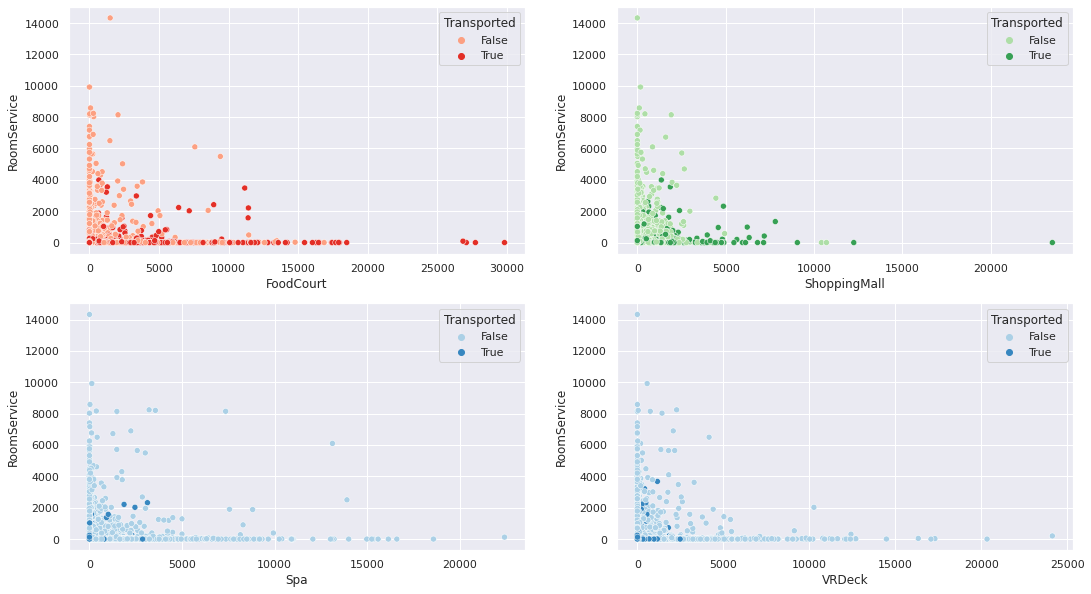

In [27]:
sns.set_theme()
fig=plt.figure(figsize=(18,10))

fig.add_subplot(2,2,1)
sns.scatterplot(data=train, x='FoodCourt', y='RoomService', hue='Transported', palette='Reds')

fig.add_subplot(2,2,2)
sns.scatterplot(data=train, x='ShoppingMall', y='RoomService', hue='Transported', palette='Greens')

fig.add_subplot(2,2,3)
sns.scatterplot(data=train, x='Spa', y='RoomService', hue='Transported', palette='Blues')


fig.add_subplot(2,2,4)
sns.scatterplot(data=train, x='VRDeck', y='RoomService', hue='Transported', palette='Blues')

<AxesSubplot:xlabel='VRDeck', ylabel='FoodCourt'>

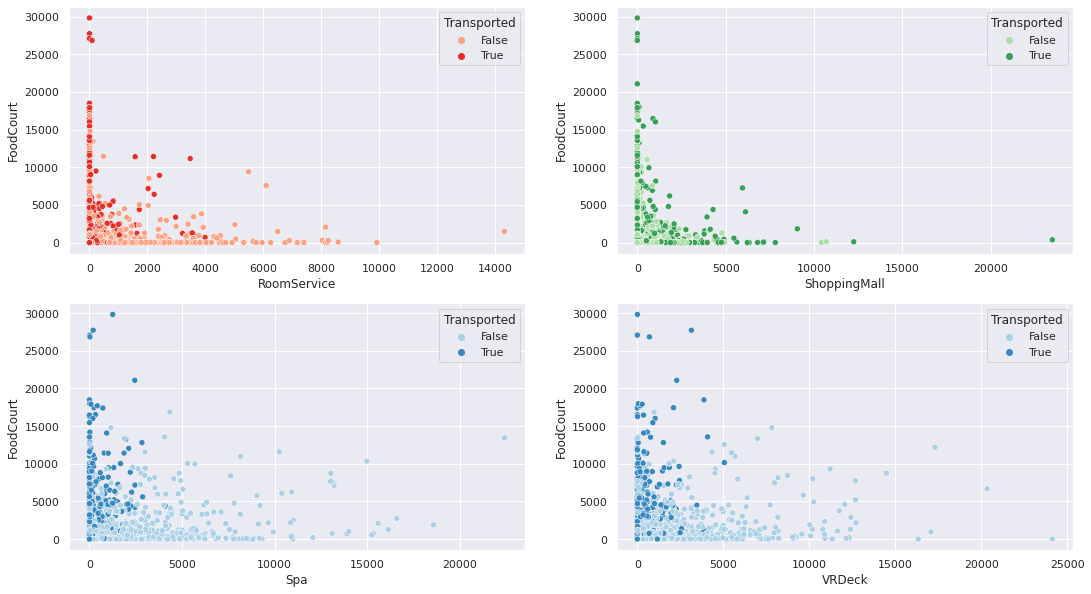

In [28]:
sns.set_theme()
fig=plt.figure(figsize=(18,10))

fig.add_subplot(2,2,1)
sns.scatterplot(data=train, x='RoomService', y='FoodCourt', hue='Transported', palette='Reds')

fig.add_subplot(2,2,2)
sns.scatterplot(data=train, x='ShoppingMall', y='FoodCourt', hue='Transported', palette='Greens')

fig.add_subplot(2,2,3)
sns.scatterplot(data=train, x='Spa', y='FoodCourt', hue='Transported', palette='Blues')


fig.add_subplot(2,2,4)
sns.scatterplot(data=train, x='VRDeck', y='FoodCourt', hue='Transported', palette='Blues')

<AxesSubplot:xlabel='VRDeck', ylabel='Spa'>

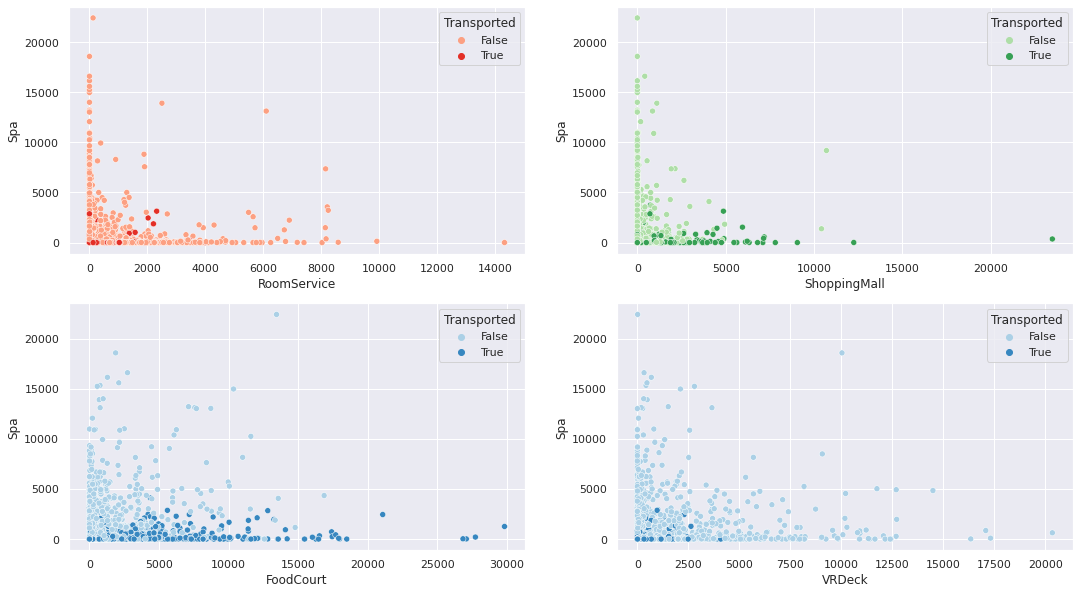

In [29]:
sns.set_theme()
fig=plt.figure(figsize=(18,10))

fig.add_subplot(2,2,1)
sns.scatterplot(data=train, x='RoomService', y='Spa', hue='Transported', palette='Reds')

fig.add_subplot(2,2,2)
sns.scatterplot(data=train, x='ShoppingMall', y='Spa', hue='Transported', palette='Greens')

fig.add_subplot(2,2,3)
sns.scatterplot(data=train, x='FoodCourt', y='Spa', hue='Transported', palette='Blues')


fig.add_subplot(2,2,4)
sns.scatterplot(data=train, x='VRDeck', y='Spa', hue='Transported', palette='Blues')

<AxesSubplot:xlabel='Spa', ylabel='VRDeck'>

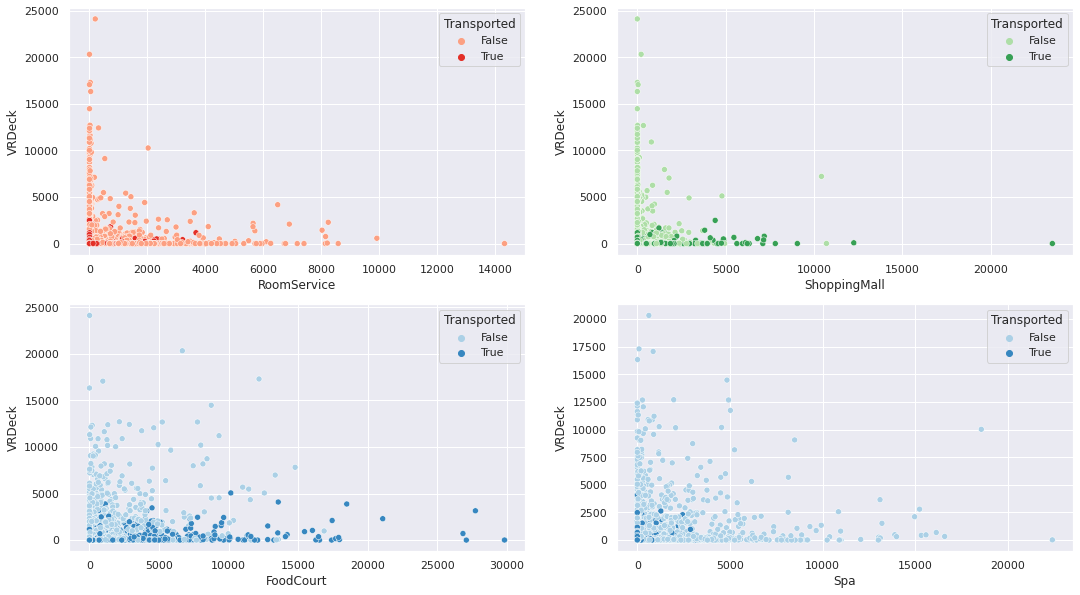

In [30]:
sns.set_theme()
fig=plt.figure(figsize=(18,10))

fig.add_subplot(2,2,1)
sns.scatterplot(data=train, x='RoomService', y='VRDeck', hue='Transported', palette='Reds')

fig.add_subplot(2,2,2)
sns.scatterplot(data=train, x='ShoppingMall', y='VRDeck', hue='Transported', palette='Greens')

fig.add_subplot(2,2,3)
sns.scatterplot(data=train, x='FoodCourt', y='VRDeck', hue='Transported', palette='Blues')


fig.add_subplot(2,2,4)
sns.scatterplot(data=train, x='Spa', y='VRDeck', hue='Transported', palette='Blues')

In [31]:
pd.DataFrame(train.isna().sum())

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [32]:
columns=['HomePlanet', 'CryoSleep', 'VIP']
for i in columns:
    train[i]=train[i].fillna(train[i].mode()[0])

In [33]:
train['Cabin']=train['Cabin'].astype(str)

In [34]:
train['Deck']=train['Cabin'].apply(lambda x : x.split('/',1)[0])

In [35]:
train['Side']=train['Cabin'].apply(lambda x :  (x.split('/',1)[-1]).split('/')[-1])

In [36]:
train['Side']=train['Side'].replace('nan', np.nan)

train['Deck']=train['Deck'].replace('nan', np.nan)
train['Cabin']=train['Cabin'].replace('nan', np.nan)

In [37]:
train['Deck'] = train['Deck'].fillna(train.groupby(['CryoSleep', 'HomePlanet', 'VIP'])['Deck'].transform(lambda x: x.value_counts().idxmax()))
train['Side'] = train['Side'].fillna(train.groupby(['CryoSleep', 'HomePlanet', 'VIP'])['Side'].transform(lambda x: x.value_counts().idxmax()))
train['Destination'] = train['Destination'].fillna(train.groupby(['CryoSleep', 'HomePlanet', 'VIP'])['Destination'].transform(lambda x: x.value_counts().idxmax()))

In [38]:
train['Age'] = train['Age'].fillna(train.groupby(['CryoSleep', 'HomePlanet', 'VIP', 'Deck', 'Side'])['Age'].transform('mean'))

In [39]:
train['RoomService'] = train['RoomService'].fillna(train.groupby(['CryoSleep', 'HomePlanet', 'VIP', 'Deck', 'Side'])['RoomService'].transform('mean'))

In [40]:
train['FoodCourt'] = train['FoodCourt'].fillna(train.groupby(['CryoSleep', 'HomePlanet', 'VIP', 'Deck', 'Side'])['FoodCourt'].transform('mean'))

In [41]:
train['Spa'] = train['Spa'].fillna(train.groupby(['CryoSleep', 'HomePlanet', 'VIP', 'Deck', 'Side'])['Spa'].transform('mean'))

In [42]:
train['ShoppingMall'] = train['ShoppingMall'].fillna(train.groupby(['CryoSleep', 'HomePlanet', 'VIP', 'Deck', 'Side'])['ShoppingMall'].transform('mean'))
train['ShoppingMall']=train['ShoppingMall'].fillna(train['ShoppingMall'].mean())

In [43]:
train['VRDeck'] = train['VRDeck'].fillna(train.groupby(['CryoSleep', 'HomePlanet', 'VIP', 'Deck', 'Side'])['VRDeck'].transform('mean'))
train['VRDeck']=train['VRDeck'].fillna(train['VRDeck'].mean())

In [44]:
pd.DataFrame(train.isna().sum())

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,199
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


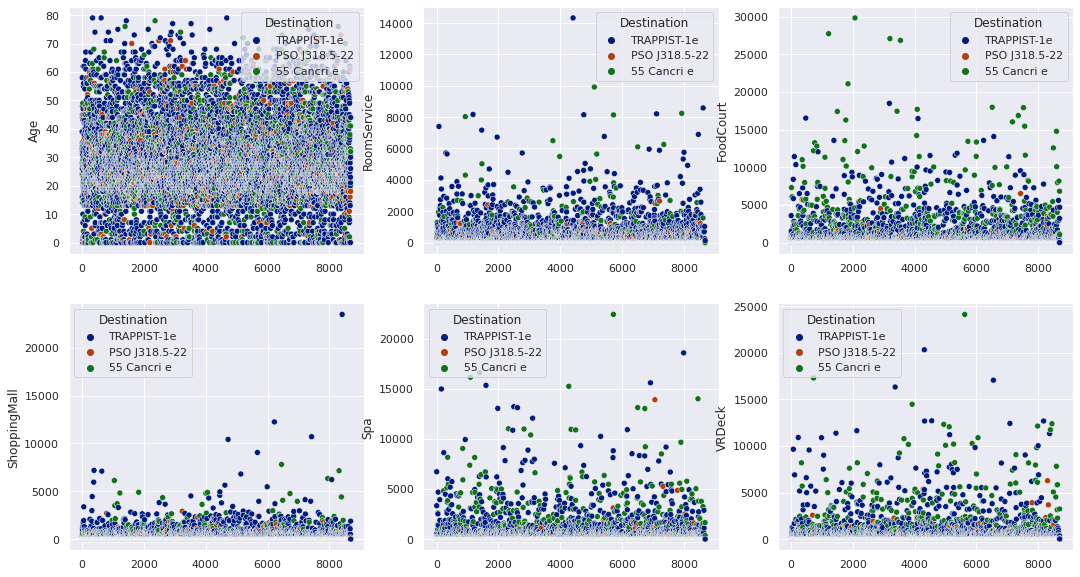

In [45]:
columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' ]
sns.set_theme()
fig=plt.figure(figsize=(18,10))
j=1

for i in columns:
    fig.add_subplot(2,3,j)
    sns.scatterplot(data=train, x=range(len(train)), y=i, hue='Destination', palette='dark')
    j+=1

In [46]:
train=train[~ ((train['Spa']>7500) | (train['VRDeck']>10000) | (train['FoodCourt']>11000) | (train['RoomService']>=6000) | (train['ShoppingMall']>4000) ) ] 

In [47]:
Y=train['Transported']

In [48]:
train['Total_expenses']= train['VRDeck']+train['Spa']+train['ShoppingMall']+train['FoodCourt']+train['RoomService']

In [49]:
train=train.drop(['Cabin', 'PassengerId', 'Name', 'Id', 'Transported'], axis=1)

In [50]:
dictionary= {'A':6 , 'B':5, 'C':5 , 'D':4 , 'E':3 , 'F':2 , 'G':1, 'T':0 }

In [51]:
train=train.replace(({"Deck": dictionary}))

In [52]:
train=train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Total_expenses','Deck', 'CryoSleep', 'VIP', 'Side', 'HomePlanet', 'Destination' ]]

<p class='text-primary'> Re-arranging the columns helps to carry out standard scaling </p>

In [53]:
train['CryoSleep']=train['CryoSleep'].astype('float32')

In [54]:
train['Side']=train['Side'].apply(lambda x: 1 if x=='S' else 0)

In [55]:
train=pd.get_dummies(train, drop_first=True)

In [56]:
train.skew()

Age                          0.428984
RoomService                  4.351177
FoodCourt                    4.756959
ShoppingMall                 4.041654
Spa                          4.898456
VRDeck                       5.875419
Total_expenses               3.040830
Deck                         0.772849
CryoSleep                    0.601990
VIP                          6.532107
Side                        -0.025554
HomePlanet_Europa            1.263550
HomePlanet_Mars              1.463751
Destination_PSO J318.5-22    2.799791
Destination_TRAPPIST-1e     -0.898106
dtype: float64

In [57]:
skewed_columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Total_expenses']
from scipy.special import boxcox1p
lam=0.2
for i in skewed_columns:
    train[i]= boxcox1p(train[i],lam)

In [58]:
train.skew()

Age                          0.428984
RoomService                  1.383045
FoodCourt                    1.532830
ShoppingMall                 1.471442
Spa                          1.490550
VRDeck                       1.577231
Total_expenses               0.019119
Deck                         0.772849
CryoSleep                    0.601990
VIP                          6.532107
Side                        -0.025554
HomePlanet_Europa            1.263550
HomePlanet_Mars              1.463751
Destination_PSO J318.5-22    2.799791
Destination_TRAPPIST-1e     -0.898106
dtype: float64

In [59]:
X=train.values
Y=Y.values

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=1)

In [61]:
from sklearn.preprocessing import RobustScaler
sc= RobustScaler()
X_train[:,0:7]= sc.fit_transform(X_train[:, 0:7])
X_test[:,0:7]= sc.transform(X_test[:, 0:7])

In [62]:
model_pipeline=[]
model_pipeline.append(DecisionTreeClassifier(random_state=41))
model_pipeline.append(LogisticRegression(solver='saga', penalty='l1',random_state=42))
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(RandomForestClassifier(random_state=44))
model_pipeline.append(SVC(random_state=45, probability=True))
model_pipeline.append(xgb.XGBClassifier(random_state=46))
model_pipeline.append(lgbm.LGBMClassifier(random_state=47))

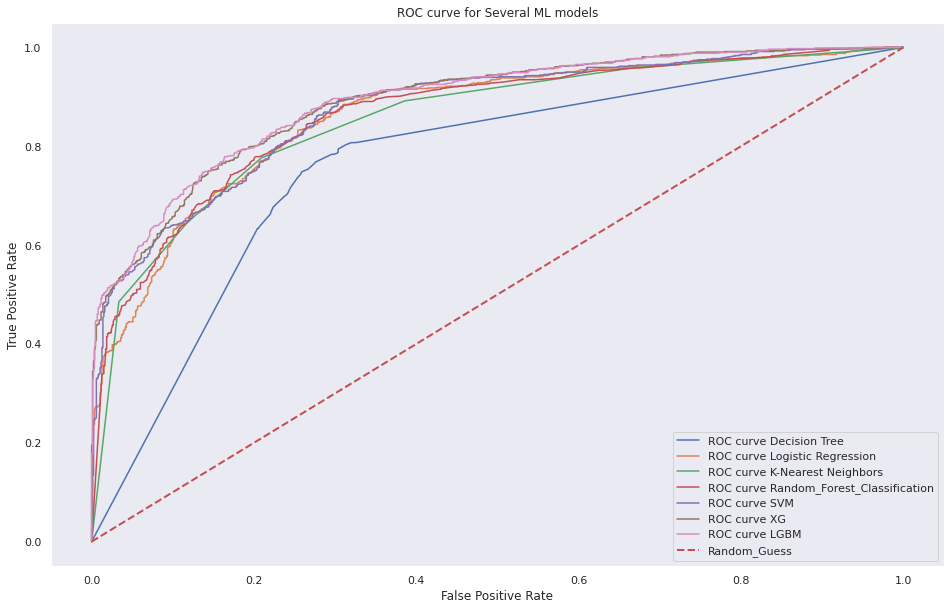

In [63]:
model_list=['Decision Tree', 'Logistic Regression', 'K-Nearest Neighbors', 'Random_Forest_Classification', 'SVM', 'XG', 'LGBM']
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve
from sklearn import metrics
i=0
acc=[]
cm=[]

plt.figure(figsize=(16,10))

for classifier in model_pipeline:
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    acc.append(round(accuracy_score(Y_test, Y_pred),2))
    cm.append(confusion_matrix(Y_test, Y_pred))
    Pred_prob=classifier.predict_proba(X_test)
    fpr, tpr, thresh = metrics.roc_curve(Y_test, Pred_prob[:,1])
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve {}'.format(model_list[i]))
    i+=1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random_Guess')
plt.title('ROC curve for Several ML models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

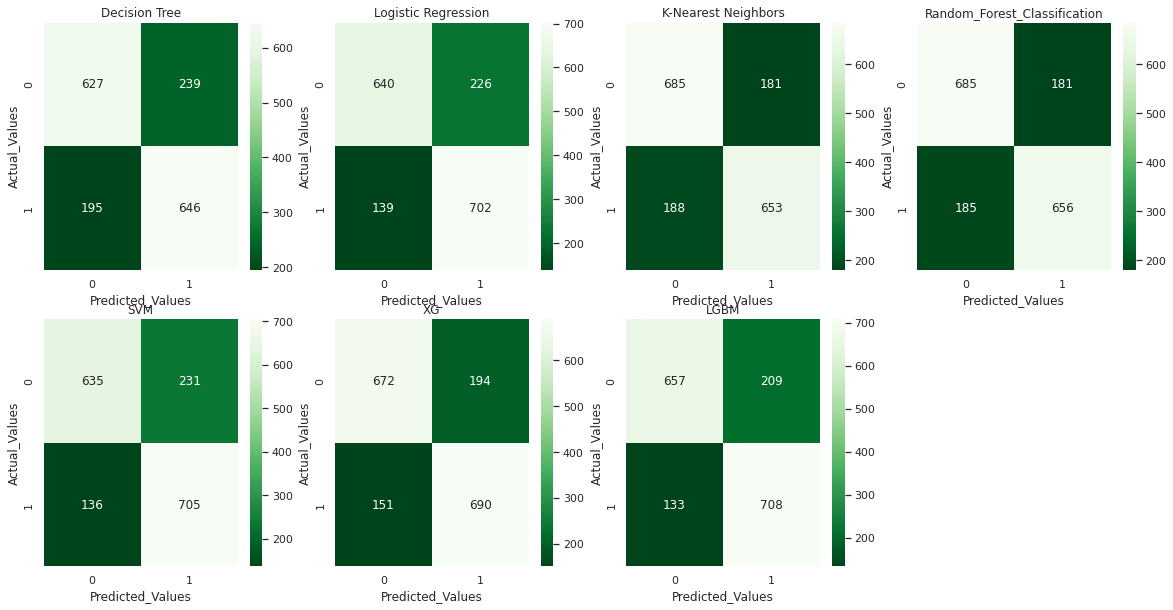

In [64]:
# Let us plot confusion matrix for all the model and compare.

fig=plt.figure(figsize=(20,10))

for i in range(0,len(cm)):
    cm_con=cm[i]
    model=model_list[i]
    sub_fig_title=fig.add_subplot(2,4,i+1).set_title(model)
    plot_map=sns.heatmap(cm_con,annot=True,cmap='Greens_r',fmt='g')
    plot_map.set_xlabel('Predicted_Values')
    plot_map.set_ylabel('Actual_Values')

In [65]:
result=pd.DataFrame({'Model': model_list, 'Accuracy': acc})
result

,Model,Accuracy
0,Decision Tree,0.75
1,Logistic Regression,0.79
2,K-Nearest Neighbors,0.78
3,Random_Forest_Classification,0.79
4,SVM,0.79
5,XG,0.80
6,LGBM,0.80


In [66]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LogisticRegression(random_state = 0, solver='sag', penalty='l2'), X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 78.80 %
Standard Deviation: 2.06 %


In [67]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features=13, min_samples_split=10, splitter='best'), X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 78.87 %
Standard Deviation: 1.60 %


In [68]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgb.XGBClassifier(random_state=10, booster='gbtree', gamma=0.2, learning_rate=0.07), X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.08 %
Standard Deviation: 1.19 %


In [69]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lgbm.LGBMClassifier(random_state=10, boosting_type='gbdt', learning_rate=0.1, max_depth=6), X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.53 %
Standard Deviation: 1.49 %


In [70]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = SVC(kernel='rbf', gamma=0.1, C=3, random_state=4), X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.09 %
Standard Deviation: 1.48 %


In [71]:
model_pipeline=[]
model_pipeline.append(DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features=7, min_samples_split=10, splitter='best'))
model_pipeline.append(LogisticRegression(solver='saga', penalty='l1',random_state=42))
model_pipeline.append(SVC(kernel='rbf', gamma=0.1, C=3, random_state=4,probability=True))
model_pipeline.append(xgb.XGBClassifier(random_state=10, booster='gbtree', gamma=0.2, learning_rate=0.07))
model_pipeline.append(lgbm.LGBMClassifier(random_state=10, boosting_type='dart', learning_rate=0.25, max_depth=8))

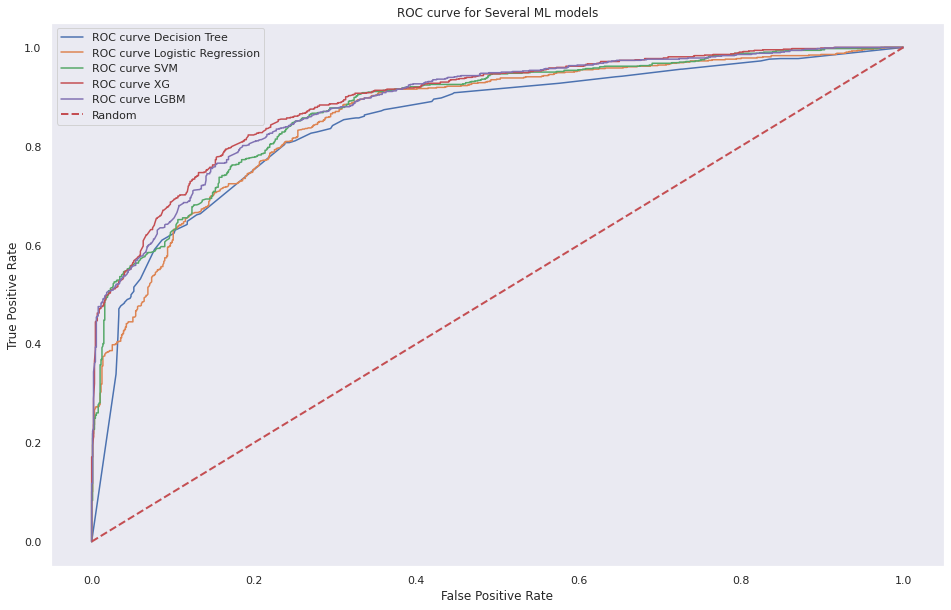

In [72]:
model_list=['Decision Tree', 'Logistic Regression', 'SVM', 'XG', 'LGBM']
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve
from sklearn import metrics
i=0
acc=[]
cm=[]

plt.figure(figsize=(16,10))

for classifier in model_pipeline:
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    acc.append(round(accuracy_score(Y_test, Y_pred),2))
    cm.append(confusion_matrix(Y_test, Y_pred))
    Pred_prob=classifier.predict_proba(X_test)
    fpr, tpr, thresh = metrics.roc_curve(Y_test, Pred_prob[:,1])
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve {}'.format(model_list[i]))
    i+=1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random')
plt.title('ROC curve for Several ML models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()